## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data # apparently, prints the correct result: 5 firt rows, 5 last rows, and size, but no documentation guarantees this behavior

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
display(pd.concat([ data.head(5), data.tail(5) ]))
display(data.shape)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().any(None)

False

Количественные - duration, amount, age \\
Бинарные - telephone, foreign_worker, credit_risk \\
Порядковые - status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable \\
Категориальные - credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job \\
<hr>

1. Определение бинарных и количественных признаков тривиально.
2. installment_rate, present_residence, number_credits и people_liable являются очевидно порядковыми - значения признаков представляют из себя несколько интервалов, которые можно тривиальным образом "отсортировать"
3. Признаки status, savings и employment_duration можно считать как порядковыми, так и категориальными: фактически, значения указанных признаков - несколько интервалов и одно дополнительное значение, указывающее на отсутствие или неизвестность значения. Я решил считать эти признаки порядковыми, так как естественным образом отсутствие информации можно считать как нулевое, самое "плохое", значение признака.
4. Остальные признаки являются очевидно категориальными - их значения представляются несколькими строками, которым нельзя естественным образом задать порядок.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data[["amount", "purpose"]].groupby("purpose").mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
print('Q: Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)?')
column = data[data['age'] < 30]['housing']
print(f'A: {column[column == "rent"].count() / column.count()}')

Q: Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)?
A: 0.6666666666666666


In [ ]:
print('Q: А какой процент клиентов старше 40 лет снимает жилье?')
column = data[data['age'] > 40]['housing']
print(f'A: {column[column == "rent"].count() / column.count()}')

Q: А какой процент клиентов старше 40 лет снимает жилье?
A: 0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [ ]:
print('Q: У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?')
column = data[data['foreign_worker'] == 'yes']['number_credits']
print(f'A: {column[(column == "4-5") | (column == ">= 6")].count()}')

Q: У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?
A: 1


### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

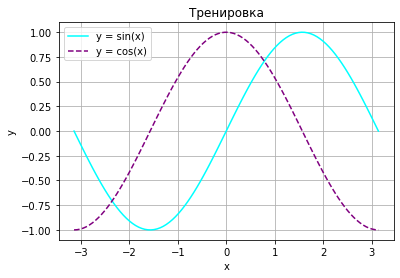

In [ ]:
X = np.linspace(-np.pi, np.pi, 100)
plt.plot(X, np.sin(X), label = 'y = sin(x)', color = 'cyan')
plt.plot(X, np.cos(X), label = 'y = cos(x)', color = 'purple', linestyle = 'dashed')

plt.grid()
plt.legend()
plt.title("Тренировка")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Вывод: график похож на теоретическое ожидание. Действительно получены две периодические кривые, по виду напоминающие синус и косинус: первый график убывает до -π / 2, затем возрастает до π / 2, после чего вновь убывает; второй график возрастает до 0, после чего убывает

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

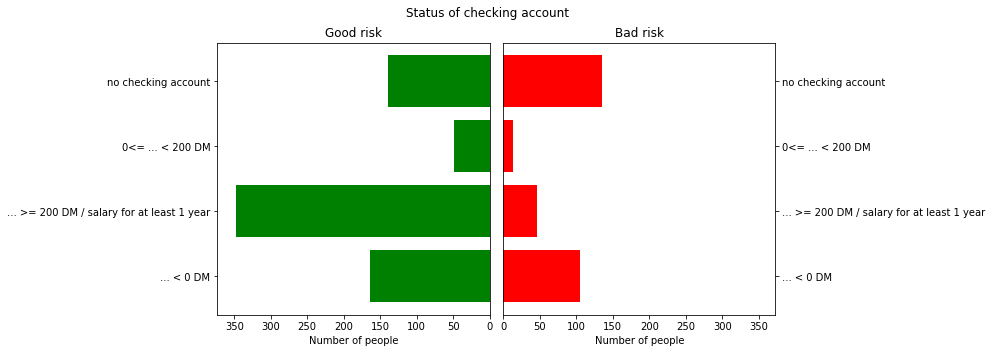

In [ ]:
def groupByStatus(credit_risk):
  return data[data["credit_risk"] == credit_risk].groupby("status")["credit_risk"].count().reset_index()
goodGrouping = groupByStatus("good")
badGrouping = groupByStatus("bad")
xlim = max(goodGrouping["credit_risk"].max(), badGrouping["credit_risk"].max()) + 25

figure, axes = plt.subplots(1, 2, figsize = (10, 5))
figure.suptitle("Status of checking account")
figure.subplots_adjust(wspace = 0.05)

axes[0].barh(goodGrouping["status"], goodGrouping["credit_risk"], color = 'green')
axes[0].set_title("Good risk")
axes[0].set_xlim((0, xlim))
axes[0].set_xlabel("Number of people")
axes[0].invert_xaxis()

axes[1].barh(badGrouping["status"], badGrouping["credit_risk"], color = 'red')
axes[1].set_title("Bad risk")
axes[1].set_xlim((0, xlim))
axes[1].yaxis.set_ticks_position('right')
axes[1].set_xlabel("Number of people")

plt.show()

Вывод: явно видно, что люди с большим размером текущего счёта составляют большую часть положительных кейсов, в то время как самыми неблагонадёжными можно считать людей без текущего счёта: в этой категории количество отрицательных кейсов практически превосходит количество положительных. Количество как положительных, так и отрицательных кейсов невелико для людей с размером текущего счёта от 0 до 200, что позволяет утверждать о том, что эта категория людей достаточно малочисленна.

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

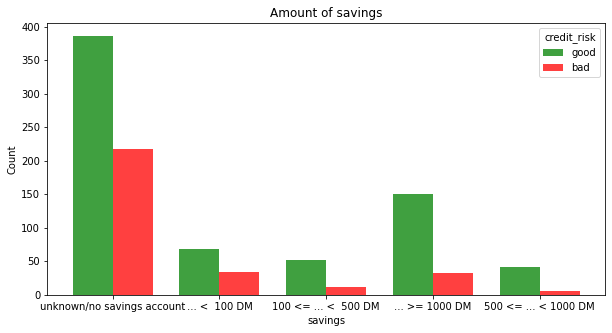

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(data, x="savings", hue="credit_risk", multiple="dodge", palette = ["green", "red"], hue_order = ["good", "bad"], shrink = 0.75, edgecolor = None).set_title("Amount of savings")
plt.show()

Вывод: явно видно, что у большинства людей нет сберегательного счёта. Также нетрудно заметить, что с увеличением размера сберегательного счёта процент отрицательных кейсов, как ни странно, уменьшается.

Вероятно, ожидаются такие ответы: \\
Q: Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? \\
A: Seaborn \\
Q: А с точки зрения восприятия результата? \\
A: Matplotlib \\
 \\
Но я бы на оба вопроса дал ответ Matplotlib. Не люблю использовать сомнительные абстракции над тем, что и так является абстракцией :)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

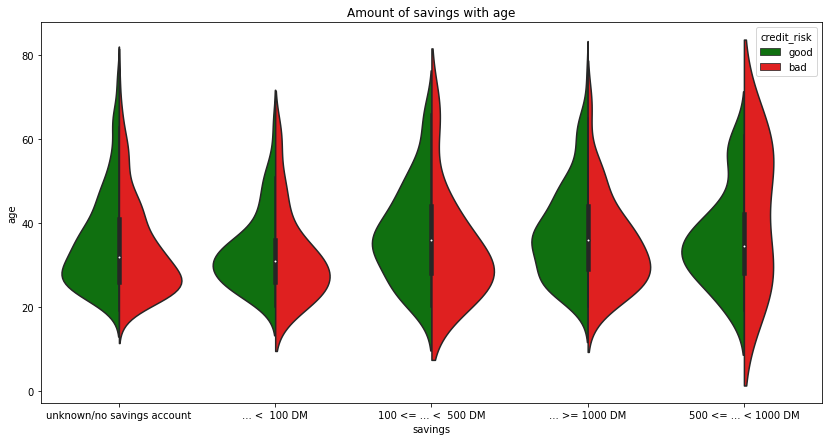

In [ ]:
plt.figure(figsize = (14, 7))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette = ["green", "red"]).set_title("Amount of savings with age")
plt.show()

Вывод: по графику явно видно, что возраст большинства людей в представленном наборе данных находится между 20 и 40, где и наблюдается наибольшее число положительных и отрацительных кейсов. Интересно отметить, что среди людей с размером сберегательного счёта от 500 до 1000 количество отрицательных кейсов распределено по возрасту примерно равномерно. Также можно отметить, что пики количества отрицательных кейсов находятся "ниже" пиков количества положительных кейсов во всех диапазонах, что позволяет утверждать об уменьшении количества отрицательных кейсов с увеличением возраста.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

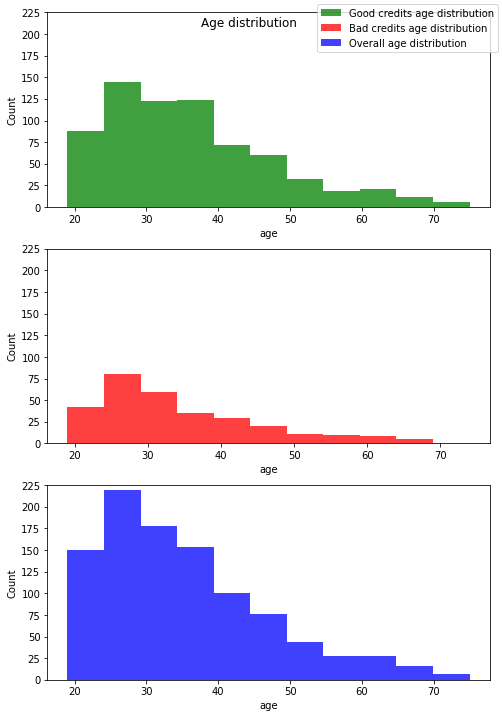

In [ ]:
figure, axes = plt.subplots(3, 1, figsize = (7, 10))

sns.histplot(data[data["credit_risk"] == "good"], x="age", color = "green", bins = 11, edgecolor = None, ax = axes[0], label = "Good credits age distribution")
axes[0].set_ylim((0, 225))

sns.histplot(data[data["credit_risk"] == "bad"], x="age", color = "red", bins = 11, edgecolor = None, ax = axes[1], label = "Bad credits age distribution")
axes[1].set_ylim((0, 225))

sns.histplot(data, x="age", color = "blue", bins = 11, edgecolor = None, ax = axes[2], label = "Overall age distribution")
axes[2].set_ylim((0, 225))

figure.tight_layout()
figure.legend()
figure.suptitle("Age distribution")
plt.show()

Вывод: большая часть предитов была взята людьми в возрасте приблизительно между 25 и 30. Заметим, что все три графика имеют приблизительно одинаковое распределение; явно выделяется лишь количество положительных кейсов в возрасте от 35 до 40 - их относительное количество явно больше, чем в других возрастных группах. Также можно отметить, что все кейсы людей в возрасте выше 70 были положительными.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

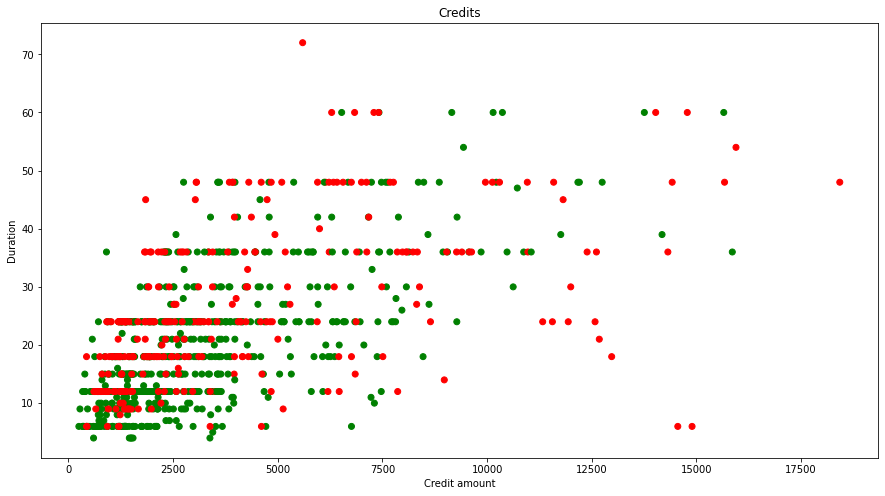

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(data["amount"], data["duration"], c = data['credit_risk'].map({ 'good': 'green', 'bad': 'red' }))
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.title("Credits")
plt.show()

Вывод:
1. Явно видно, что большинство кредитов небольшие (до 5000) и были взяты на небольшой срок (до 30).
2. Среди самых маленьких и недолгосрочных кредитов преобладают положительные кейсы, в то время как наиболее большие и длительные кейсы чаще оказываются отрицательными.
3. График в большей своей части представляет набор горизонтальных прямых, что можно объяснить тем, что банки не предлагают кредиты на "странный срок" - только на "красивое" число лет - 15, 20, 30, 50 и т.д.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

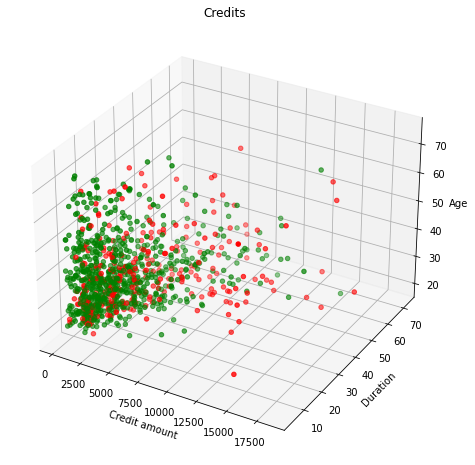

In [ ]:
figure = plt.figure(figsize = (15, 8))
ax = figure.add_subplot(projection = '3d')
ax.scatter(data["amount"], data["duration"], data["age"], c = data['credit_risk'].map({ 'good': 'green', 'bad': 'red' }))
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
plt.title("Credits")
plt.show()

Вывод: все тенденции, замеченные на предыдущем графике, применимы и к этому графику. Дополнительно можно отметить, что зависимость от возраста невелика: явное увеличение количества отрицательных кейсов в сравнении с положительными не прослеживается ни для какой возрастной группы.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
toremove = [ 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job' ]
toencode = [ 'telephone', 'foreign_worker', 'credit_risk', 'status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable' ]
def removeCategorial(data):
    return data.drop(columns = toremove)
def buildEncoder(data):
  encoder = { }
  for attribute in toencode:
    encoder[attribute] = { }
    values = data[attribute].unique()
    for i in range(len(values)):
      encoder[attribute][values[i]] = i
  return encoder
def encode(data, encoder):
  data = data.copy(True)
  for attribute in toencode:
    data[attribute] = data[attribute].map(encoder[attribute])
  return data

In [ ]:
data = removeCategorial(data)
encoder = buildEncoder(data)
encode(data, encoder)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,0,0,0,21,0,0,0,0,0
1,0,9,2799,0,1,1,1,36,1,1,0,0,0
2,1,12,841,1,2,1,0,23,0,0,0,0,0
3,0,12,2122,0,1,2,1,39,1,1,0,1,0
4,0,12,2171,0,1,0,0,38,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,1,1,0,21,0,1,0,0,1
996,0,24,2303,0,4,0,3,45,0,0,0,0,1
997,2,21,12680,3,4,0,0,30,0,0,1,0,1
998,1,12,6468,3,3,1,3,52,0,0,1,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
class Standartizer:
  def train(self, X_train: np.array) -> np.array:
    self.averages = np.sum(X_train, axis = 0) / X_train.shape[0]
    self.deviations = np.sqrt(np.sum((X_train - self.averages) ** 2, axis = 0) / X_train.shape[0])
  def use(self, X: np.array) -> np.array:
    return np.divide(X - self.averages, self.deviations, where = (self.deviations != 0))

class Normalizer:
  def train(self, X_train: np.array) -> np.array:
    self.subtract = np.min(X_train, axis = 0)
    self.divide = np.max(X_train, axis = 0) - self.subtract
  def use(self, X: np.array) -> np.array:
    return np.divide(X - self.subtract, self.divide, where = (self.divide != 0))

In [ ]:
class PredictorAlwaysGood:
  def train(self, X_train: np.array, y_train: np.array) -> None:
    return None

  def predict(self, X: np.array) -> np.array:
    res = np.empty(X.shape[0])
    res.fill(1)
    return res

In [ ]:
class PredictorHandmade:
  def train(self, X_train: np.array, y_train: np.array) -> None:
    return None

  def predict(self, X: np.array) -> np.array:
    res = np.array([])
    for attributes in X:
      if (attributes[2] > 11000 or attributes[1] > 45):
        res = np.append(res, 0)
      else:
        res = np.append(res, 1)
    return res

In [ ]:
class PredictorKNN:
  def __init__(self, neighbours = 26):
    self.neighbours = neighbours
    self.dataChanger = Normalizer()

  def train(self, X_train: np.array, y_train: np.array) -> None:
    self.dataChanger.train(X_train)
    self.X_train = self.dataChanger.use(X_train)
    self.y_train = y_train
    return None

  def distances(self, x: np.array):
    return np.apply_along_axis(np.sum, 1, np.abs(self.X_train - x))
  def predict(self, X: np.array) -> np.array:
    X = self.dataChanger.use(X)
    res = [ ]
    for item in X:
        amountOfOnes = self.y_train[np.argsort(self.distances(item))][0:self.neighbours].sum()
        res.append(1 if amountOfOnes > self.neighbours / 2 else 0)
    return res

In [ ]:
class PredictorLinearRegression:
  def __init__(self, breakpoint = 0.5545):
    self.breakpoint = breakpoint
    self.dataChanger = Standartizer()
  def addFreeCoeff(self, X):
    freeCoeff = np.empty(X.shape[0])
    freeCoeff.fill(1)
    return np.concatenate(( np.array([ freeCoeff ]).T, X ), axis = 1)

  def train(self, X_train: np.array, y_train: np.array) -> None:num
    self.dataChanger.train(X_train)
    X_train = self.dataChanger.use(X_train)
    X_train = self.addFreeCoeff(X_train)
    self.coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    return None
  def predict(self, X: np.array) -> np.array:
    X = self.dataChanger.use(X)
    X = self.addFreeCoeff(X)
    return (((X @ self.coeffs) > self.breakpoint) * 1)

In [ ]:
betterEncoder = {
    'telephone': { 'no': 0, 'yes (under customer name)': 1 },
    'foreign_worker': { 'no': 0, 'yes': 1 },
    'credit_risk': { 'bad': 0, 'good': 1 },
    'status':
    {
        'no checking account': -125,
        '... < 0 DM': 0,
        '0<= ... < 200 DM': 125,
        '... >= 200 DM / salary for at least 1 year': 250
    },
    'savings':
    {
        'unknown/no savings account': -250,
        '... <  100 DM': 50,
        '100 <= ... <  500 DM': 350,
        '500 <= ... < 1000 DM': 750,
        '... >= 1000 DM': 1250
    },
    'employment_duration':
    {
        'unemployed': 0,
        '< 1 yr': 0.5,
        '1 <= ... < 4 yrs': 2.5,
        '4 <= ... < 7 yrs': 5.5,
        '>= 7 yrs': 8
    },
    'installment_rate':
    {
        '< 20': 12.5,
        '20 <= ... < 25': 22.5,
        '25 <= ... < 35': 30,
        '>= 35': 35
    },
    'present_residence':
    {
        '< 1 yr': 0.5,
        '1 <= ... < 4 yrs': 3,
        '4 <= ... < 7 yrs': 5.5,
        '>= 7 yrs': 8
     },
    'number_credits': { '1': 1, '2-3': 2.5, '4-5': 4.5, '>= 6': 7 },
    'people_liable': { '0 to 2': 1, '3 or more': 3 }
}
data = encode(data, betterEncoder)


def setup(X_train, y_train, model):
  model = model()
  model.train(X_train, y_train)
  return model
def predict(Xtest: np.array) -> np.array:
    return predictor.predict(Xtest)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

models = {
    "Always good": PredictorAlwaysGood, # Interestingly, rather good
    "Handmade": PredictorHandmade, # A bit better, but doing anything by hand is not good :)
    "KNN": PredictorKNN,
    "Linear regression": PredictorLinearRegression
}
for model in models:
  predictor = setup(X_train, y_train, models[model])
  print(f"{model} - {accuracy_score(y_test, predict(X_test))}")

<ipython-input-26-602df0d5fc2a>:57: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


Always good - 0.66
Handmade - 0.68
KNN - 0.76
Linear regression - 0.748
